# Text classification using word2vec

#### importing 20-newsgroup dataset.

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroup = fetch_20newsgroups()
print("Dataset Size: {}".format(len(newsgroup.data)))
print("Total targets: {}".format(len(newsgroup.target_names)))
print(newsgroup.target_names)

Dataset Size: 11314
Total targets: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### Preprocess the dataset.

In [2]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

tokenizer = RegexpTokenizer('[a-zA-Z]{2,}')
stop_words = stopwords.words('english')
token_corpus = []
data = []

for d in newsgroup.data:
    tokens = tokenizer.tokenize(d)
    tokens = [word.lower() for word in tokens if word not in stop_words]
    data.append(" ".join(tokens))
    token_corpus.append(tokens)
    
print(newsgroup.data[0])
print(token_corpus[0])
print(data[0])

[nltk_data] Downloading package stopwords to /home/satvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





['from', 'lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'what', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'it', 'door'

#### Convert the words in the dataset to vectors of dimension 100 using Word2Vec

In [3]:
import gensim
from gensim import corpora, models, similarities
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
num_cores = multiprocessing.cpu_count()
print ('Number of cores = {}'.format(num_cores))

word2vec_model = models.Word2Vec(token_corpus, min_count=10, size = 100, workers=num_cores)
word2vec_model.wv['cat']

Number of cores = 4


array([ 0.03299198,  0.39599147,  0.48288986,  0.15853985,  0.14804846,
       -0.35876712,  0.12785037,  0.03148147,  0.29848772, -0.27562976,
        0.50553095, -0.09180488,  0.10817923, -0.18975006, -0.03252625,
        0.23054856,  0.05738856,  0.32878736, -0.03195329,  0.3259884 ,
        0.39658597,  0.02936324,  0.21074353, -0.1943917 , -0.33368573,
        0.06978343,  0.17804761, -0.08485417,  0.24365388, -0.05086325,
       -0.0436846 ,  0.288337  , -0.10661614, -0.5537953 , -0.09013732,
        0.0680664 ,  0.1137086 ,  0.00593203,  0.16255406,  0.19373281,
        0.3318974 ,  0.03379315, -0.47616494,  0.29674545, -0.50169975,
       -0.06137972, -0.25526443, -0.3196566 , -0.36451405,  0.15722436,
       -0.055157  ,  0.2416237 ,  0.00168132,  0.13461153,  0.05259632,
       -0.2499609 ,  0.08746167,  0.18517113,  0.257186  ,  0.4047734 ,
       -0.20850646, -0.6356866 ,  0.24380022, -0.14907154,  0.02863826,
       -0.2808818 , -0.15008791,  0.05248264, -0.12582836,  0.21

#### Find the vocabulary size

In [4]:
print("Vocabulary Size: {}".format(len(word2vec_model.wv.vocab)))

Vocabulary Size: 18159


#### Find the most similar words in the corpus to the word “car” along with their similarities.

In [5]:
print(*word2vec_model.wv.most_similar('car'), sep="\n")

('cars', 0.8849687576293945)
('tires', 0.8262366056442261)
('dealer', 0.823203444480896)
('owner', 0.8227309584617615)
('bike', 0.8218179941177368)
('bikes', 0.8132414817810059)
('selling', 0.812734842300415)
('bought', 0.8119872808456421)
('motorcycle', 0.810564398765564)
('truck', 0.80739426612854)


#### Find top 5 words similar to the following operations:

* girl + father - boy
* sports - bat + ball

In [6]:
print(*word2vec_model.wv.most_similar(positive=['girl', 'father'], negative=['boy']), sep="\n")
print(*word2vec_model.wv.most_similar(positive=['sports', 'ball'], negative=['bat']), sep="\n")

('son', 0.8410104513168335)
('empty', 0.8309751749038696)
('mother', 0.8298887610435486)
('sister', 0.8166846036911011)
('blood', 0.8108178377151489)
('spirit', 0.7956109046936035)
('burned', 0.7863146662712097)
('survived', 0.7857658863067627)
('his', 0.7854481935501099)
('woman', 0.7817270159721375)
('tonight', 0.8751733899116516)
('playoffs', 0.8028215765953064)
('fans', 0.8005314469337463)
('penguins', 0.7998042106628418)
('watching', 0.79937744140625)
('career', 0.7967653274536133)
('yesterday', 0.7948216199874878)
('winning', 0.7939778566360474)
('sharks', 0.7875629663467407)
('braves', 0.7853217124938965)


#### Create a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’, ‘police’, ‘government’, ‘circuit’, ‘car’].

In [7]:
words = ['baseball', 'software', 'police', 'government', 'circuit', 'car']
import copy
plot_words = copy.deepcopy(words)

for w in words:
    t = [tup[0] for tup in word2vec_model.wv.most_similar(w, topn=20)]
    plot_words.extend(t)

print(*plot_words, sep=', ')

baseball, software, police, government, circuit, car, players, espn, hockey, nhl, playoff, game, braves, phillies, stats, fans, playoffs, team, teams, league, tonight, games, pitching, lost, season, sports, hardware, macintosh, packages, network, computers, multimedia, graphics, machines, workstations, electronics, platforms, vendor, developers, applications, silicon, product, networks, amiga, interactive, architecture, tax, concealed, officers, federal, guard, income, officer, taxes, governments, citizen, cops, defamation, courts, democratic, safety, weapon, farm, passed, lawyers, drug, citizens, authorities, interests, citizen, agents, agencies, restrictions, federal, legal, governments, demand, protect, illegal, guarantees, americans, force, act, regulation, private, constitutional, frequency, signals, storage, voltage, receiver, resolution, inputs, capability, controls, load, amp, vertical, input, connections, signal, modes, feature, configuration, converter, sampling, cars, tires,

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

labels = []
tokens = []
color_lst = ['b', 'r', 'g', 'y', 'c', 'm']

for word in plot_words:
    tokens.append(word2vec_model.wv[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 8)) 
for i in range(len(x)):
    res = map(word2vec_model.wv.similarity, [labels[i] for j in range(len(words))], words)
    t = np.argmax(list(res))
    plt.scatter(x[i],y[i], c=color_lst[t])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

<Figure size 1600x800 with 1 Axes>

#### The dataset consists of documents. Each document is a datapoint. Formulate a methodology to represent each document as a vector using the word vectors. Mention the method employed to create the vector representation of the documents.

--> We find out the vector representation of individual words and then combine them in some way. Some of the possible ways are:

1. Concatenation of all the word vectors. Main disadvantages are invariable size of documents and too large files will results in very large vector.

2. Mean of all the vectors.

3. Weighted average based on the frequency.

4. Take mean of vectors for a line and concatenate these mean vectors.

--> Here we simply take out mean of all the vectors and learn the final representation.
--> Another good possible approach would be to concatenate the vectors and use a CNN classifier.



In [9]:
tag_doc_list = [TaggedDocument(w, newsgroup.target_names[i]) 
                for (w, i) in zip(token_corpus, newsgroup.target)]

print("Total tag docs: {}".format(len(tag_doc_list)))
print("Document: {}\nTags:{}".format(tag_doc_list[0][0] , tag_doc_list[0][1]))

Total tag docs: 11314
Document: ['from', 'lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'what', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'it', 'door', 'sports', 'car', 'looked', 'late', 'early', 'it', 'called', 'bricklin', 'the', 'doors', 'really', 'small', 'in', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'this', 'know', 'if', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst']
Tags:rec.autos


### Text Classification using Word2Vec model

In [10]:
# create a word2vec model 
# 0 : CBOW , 1: SG
method = ['CBOW', 'SG']
size = 100
min_count = 1

word2vec_models = [
    models.Word2Vec(token_corpus, min_count=min_count, size=size, workers=num_cores, sg=0),
    models.Word2Vec(token_corpus, min_count=min_count, size=size, workers=num_cores, sg=1)
]

In [11]:
def combine(X, op):
    if op == 'avg':
        return np.mean(X, axis=0).tolist() + np.std(X, axis=0).tolist()   

y = copy.deepcopy(newsgroup.target)
dataset = []

for m in word2vec_models:
    X = []
    v = 0
    for toks in token_corpus:
        curr_doc_wv = []    
        
        for w in toks:
            try:
                curr_doc_wv.append(m.wv[w])
            except:
                pass
        X.append(combine(curr_doc_wv, 'avg'))
    dataset.append(X)

#### Split the dataset into training (70%), validation(10%) and testing(20%) data.

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.backend.clear_session()
print ('TF version = {}'.format(tf.__version__))

train_size = 0.7
validation_size = 0.1
test_size = 0.2

for m in range(len(word2vec_models)):    
    X = dataset[m]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                test_size=(validation_size/train_size), random_state=1)
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_val = np.array(X_val)
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)
    
    print("============== METHOD : {} ==============".format(method[m]))
    print("X_train.shape : {}".format(X_train.shape))
    print("X_test.shape : {}".format(X_test.shape))
    print("X_val.shape : {}".format(X_val.shape))
    print("y_train.shape : {}".format(y_train.shape))
    print("y_test.shape : {}".format(y_test.shape))
    print("y_val.shape : {}".format(y_val.shape))
    
    num_features = len(X_train[0])
    num_classes = len(newsgroup.target_names)
    train_target = to_categorical(y_train, num_classes=num_classes)
    val_target = to_categorical(y_val, num_classes=num_classes)
    test_target = to_categorical(y_test, num_classes=num_classes)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=num_features, input_shape=(num_features,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train neural network
    history = model.fit(X_train, # Features
                          train_target, # Target vector
                          epochs=200, # Three epochs
                          verbose=1, # No output
                          batch_size=400, # Number of observations per batch
                          validation_data=(X_val, val_target)) # Data to use for evaluation
    
    loss, acc = model.evaluate(X_test, test_target, verbose=0)
    print ('Accuracy:', acc)

TF version = 2.0.0-rc0
============== METHOD : CBOW ==============
X_train.shape : (7757, 200)
X_test.shape : (2263, 200)
X_val.shape : (1294, 200)
y_train.shape : (7757,)
y_test.shape : (2263,)
y_val.shape : (1294,)
Train on 7757 samples, validate on 1294 samples
Epoch 1/200
7757/7757 [==============================] - 1s 95us/sample - loss: 2.9782 - accuracy: 0.0753 - val_loss: 2.8306 - val_accuracy: 0.1832
Epoch 2/200
7757/7757 [==============================] - 0s 30us/sample - loss: 2.7217 - accuracy: 0.1403 - val_loss: 2.4144 - val_accuracy: 0.2040
Epoch 3/200
7757/7757 [==============================] - 0s 24us/sample - loss: 2.4226 - accuracy: 0.1914 - val_loss: 2.1054 - val_accuracy: 0.3215
Epoch 4/200
7757/7757 [==============================] - 0s 29us/sample - loss: 2.2327 - accuracy: 0.2279 - val_loss: 1.9547 - val_accuracy: 0.3369
Epoch 5/200
7757/7757 [==============================] - 0s 24us/sample - loss: 2.1007 - accuracy: 0.2729 - val_loss: 1.8660 - val_accuracy: 0.

7757/7757 [==============================] - 0s 23us/sample - loss: 1.2380 - accuracy: 0.5728 - val_loss: 1.1651 - val_accuracy: 0.6105
Epoch 55/200
7757/7757 [==============================] - 0s 28us/sample - loss: 1.1862 - accuracy: 0.5884 - val_loss: 1.1387 - val_accuracy: 0.6082
Epoch 56/200
7757/7757 [==============================] - 0s 25us/sample - loss: 1.1536 - accuracy: 0.5986 - val_loss: 1.1217 - val_accuracy: 0.6376
Epoch 57/200
7757/7757 [==============================] - 0s 23us/sample - loss: 1.1628 - accuracy: 0.5995 - val_loss: 1.1746 - val_accuracy: 0.6260
Epoch 58/200
7757/7757 [==============================] - 0s 26us/sample - loss: 1.1635 - accuracy: 0.5958 - val_loss: 1.1496 - val_accuracy: 0.6221
Epoch 59/200
7757/7757 [==============================] - 0s 23us/sample - loss: 1.1597 - accuracy: 0.5939 - val_loss: 1.1430 - val_accuracy: 0.6074
Epoch 60/200
7757/7757 [==============================] - 0s 21us/sample - loss: 1.1243 - accuracy: 0.6130 - val_loss: 

7757/7757 [==============================] - 0s 26us/sample - loss: 0.9665 - accuracy: 0.6638 - val_loss: 1.0836 - val_accuracy: 0.6515
Epoch 110/200
7757/7757 [==============================] - 0s 20us/sample - loss: 0.9893 - accuracy: 0.6588 - val_loss: 1.1980 - val_accuracy: 0.6236
Epoch 111/200
7757/7757 [==============================] - 0s 28us/sample - loss: 1.0044 - accuracy: 0.6500 - val_loss: 1.0781 - val_accuracy: 0.6577
Epoch 112/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.9546 - accuracy: 0.6670 - val_loss: 1.0972 - val_accuracy: 0.6468
Epoch 113/200
7757/7757 [==============================] - 0s 26us/sample - loss: 0.9616 - accuracy: 0.6611 - val_loss: 1.0773 - val_accuracy: 0.6515
Epoch 114/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.9602 - accuracy: 0.6666 - val_loss: 1.0940 - val_accuracy: 0.6445
Epoch 115/200
7757/7757 [==============================] - 0s 23us/sample - loss: 0.9739 - accuracy: 0.6651 - val_

Epoch 164/200
7757/7757 [==============================] - 0s 32us/sample - loss: 0.8573 - accuracy: 0.7009 - val_loss: 1.1006 - val_accuracy: 0.6654
Epoch 165/200
7757/7757 [==============================] - 0s 26us/sample - loss: 0.8164 - accuracy: 0.7121 - val_loss: 1.0223 - val_accuracy: 0.6731
Epoch 166/200
7757/7757 [==============================] - 0s 28us/sample - loss: 0.8172 - accuracy: 0.7101 - val_loss: 1.0394 - val_accuracy: 0.6708
Epoch 167/200
7757/7757 [==============================] - 0s 24us/sample - loss: 0.7910 - accuracy: 0.7248 - val_loss: 1.0548 - val_accuracy: 0.6615
Epoch 168/200
7757/7757 [==============================] - 0s 27us/sample - loss: 0.8156 - accuracy: 0.7175 - val_loss: 1.0545 - val_accuracy: 0.6600
Epoch 169/200
7757/7757 [==============================] - 0s 27us/sample - loss: 0.8104 - accuracy: 0.7115 - val_loss: 1.0475 - val_accuracy: 0.6677
Epoch 170/200
7757/7757 [==============================] - 0s 24us/sample - loss: 0.8183 - accuracy:

7757/7757 [==============================] - 0s 26us/sample - loss: 1.0426 - accuracy: 0.6286 - val_loss: 0.9343 - val_accuracy: 0.6855
Epoch 18/200
7757/7757 [==============================] - 0s 20us/sample - loss: 1.0263 - accuracy: 0.6327 - val_loss: 0.9277 - val_accuracy: 0.6832
Epoch 19/200
7757/7757 [==============================] - 0s 22us/sample - loss: 1.0091 - accuracy: 0.6504 - val_loss: 0.8600 - val_accuracy: 0.7141
Epoch 20/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.9569 - accuracy: 0.6661 - val_loss: 0.8389 - val_accuracy: 0.7210
Epoch 21/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.9389 - accuracy: 0.6679 - val_loss: 0.8445 - val_accuracy: 0.7156
Epoch 22/200
7757/7757 [==============================] - 0s 23us/sample - loss: 0.9295 - accuracy: 0.6763 - val_loss: 0.8714 - val_accuracy: 0.7102
Epoch 23/200
7757/7757 [==============================] - 0s 27us/sample - loss: 0.9127 - accuracy: 0.6858 - val_loss: 

7757/7757 [==============================] - 0s 23us/sample - loss: 0.5848 - accuracy: 0.8022 - val_loss: 0.6600 - val_accuracy: 0.8006
Epoch 73/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.5578 - accuracy: 0.8129 - val_loss: 0.6695 - val_accuracy: 0.7991
Epoch 74/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.5734 - accuracy: 0.8079 - val_loss: 0.6952 - val_accuracy: 0.7828
Epoch 75/200
7757/7757 [==============================] - 0s 20us/sample - loss: 0.5835 - accuracy: 0.8132 - val_loss: 0.6552 - val_accuracy: 0.7960
Epoch 76/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.5642 - accuracy: 0.8119 - val_loss: 0.7042 - val_accuracy: 0.7790
Epoch 77/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.5773 - accuracy: 0.8046 - val_loss: 0.6816 - val_accuracy: 0.7890
Epoch 78/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.5784 - accuracy: 0.8024 - val_loss: 

Epoch 127/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.4273 - accuracy: 0.8548 - val_loss: 0.6943 - val_accuracy: 0.7937
Epoch 128/200
7757/7757 [==============================] - 0s 20us/sample - loss: 0.4512 - accuracy: 0.8472 - val_loss: 0.7171 - val_accuracy: 0.7991
Epoch 129/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.4377 - accuracy: 0.8546 - val_loss: 0.6837 - val_accuracy: 0.8045
Epoch 130/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.4081 - accuracy: 0.8609 - val_loss: 0.6585 - val_accuracy: 0.8099
Epoch 131/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.3901 - accuracy: 0.8684 - val_loss: 0.6935 - val_accuracy: 0.7998
Epoch 132/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.3985 - accuracy: 0.8672 - val_loss: 0.6978 - val_accuracy: 0.7960
Epoch 133/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.4181 - accuracy:

7757/7757 [==============================] - 0s 23us/sample - loss: 0.3288 - accuracy: 0.8885 - val_loss: 0.7090 - val_accuracy: 0.8037
Epoch 182/200
7757/7757 [==============================] - 0s 23us/sample - loss: 0.3245 - accuracy: 0.8957 - val_loss: 0.6831 - val_accuracy: 0.8145
Epoch 183/200
7757/7757 [==============================] - 0s 26us/sample - loss: 0.3157 - accuracy: 0.8920 - val_loss: 0.7439 - val_accuracy: 0.8053
Epoch 184/200
7757/7757 [==============================] - 0s 27us/sample - loss: 0.3262 - accuracy: 0.8908 - val_loss: 0.6812 - val_accuracy: 0.8199
Epoch 185/200
7757/7757 [==============================] - 0s 24us/sample - loss: 0.3318 - accuracy: 0.8850 - val_loss: 0.7302 - val_accuracy: 0.8006
Epoch 186/200
7757/7757 [==============================] - 0s 21us/sample - loss: 0.3740 - accuracy: 0.8706 - val_loss: 0.7228 - val_accuracy: 0.8130
Epoch 187/200
7757/7757 [==============================] - 0s 22us/sample - loss: 0.3282 - accuracy: 0.8938 - val_

#### Accuracy for CBOW model is around 66.0% whereas accuracy for SG model is around 78.8%. Clearly SG outperforms CBOW by a very large margin.

In [18]:
hist_dict = history.history
print (hist_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


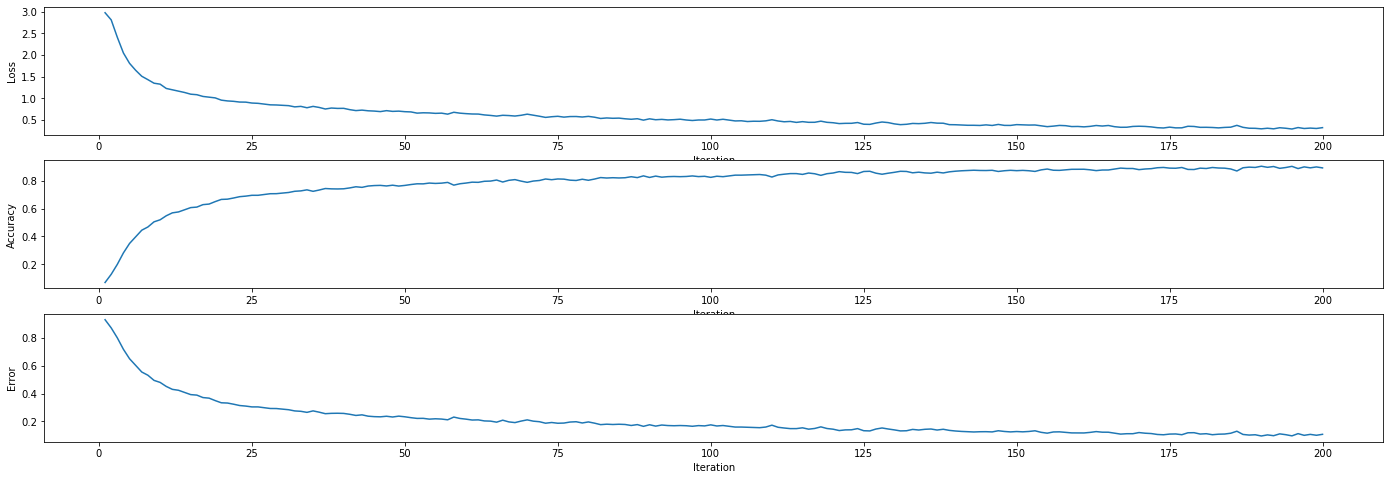

In [26]:
num_rows = 1
num_cols = 3
plt.figure(figsize=(8 * num_cols, 8 * num_rows))
plt.xticks([])
plt.yticks([])
plt.grid(False)

epochs = range (1, 201)

plt.subplot (num_cols, num_rows, 1)
plt.plot (epochs, hist_dict['loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot (num_cols, num_rows, 2)
plt.plot (epochs, hist_dict['accuracy'])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.subplot (num_cols, num_rows, 3)
plt.plot (epochs, 1 - np.array(hist_dict['accuracy']))
plt.xlabel('Iteration')
plt.ylabel('Error')

plt.show()


Since this is not a binary classification problem its not possible to define what is false positive or false negative.